In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bundle_item_map=pickle.load(open('../data/processed_data/bundle_item_map','rb'))
user_bundle_map=pickle.load(open('../data/processed_data/user_bundle_map','rb'))
bundle_diversity_map=pickle.load(open('../data/processed_data/bundle_diversity_map','rb'))

In [3]:
user_item_map=pickle.load(open('../data/processed_data/user_item_map','rb'))
item_data=pickle.load(open('../data/processed_data/all_items','rb'))
itemID_item_map = pickle.load(open('../data/processed_data/itemID_item_map','rb'))

In [4]:
def convert2Price(data, key):
    res = []
    for k in item_data:
        if '$' not in k[key]:
            res += 0,
        else:
            try:
                idx = k[key].find('$')
                res += float(k[key][idx+1:]),
            except:
                print k[key]
    return res

In [5]:
original_price = np.array(convert2Price(item_data, 'original_price'))
discount_final_price = np.array(convert2Price(item_data, 'discount_final_price'))

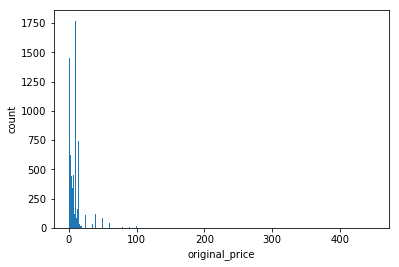

In [6]:
plt.hist(original_price, bins=np.arange(original_price.min(), original_price.max()+1))
plt.xlabel('original_price')
plt.ylabel('count')
plt.show()

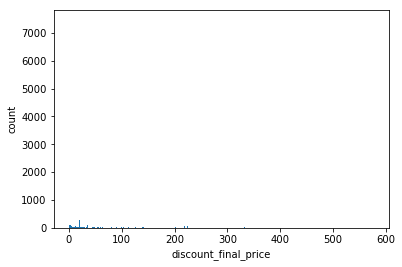

In [8]:
plt.hist(discount_final_price, bins=np.arange(discount_final_price.min(), discount_final_price.max()+1))
plt.xlabel('discount_final_price')
plt.ylabel('count')
plt.show()

In [9]:
from itertools import groupby
freq = {key:len(list(group)) for key, group in \
        groupby(np.sort([str(int(x) / 5 * 5) + '~' + str((int(x) / 5  + 1)* 5) for x in discount_final_price]))}

In [10]:
topPrice =  sorted(freq.items(), key = lambda x: -x[1])[:20]

In [11]:
for price in topPrice:
    print price

('0~5', 7785)
('20~25', 364)
('5~10', 209)
('15~20', 188)
('10~15', 187)
('35~40', 130)
('45~50', 107)
('25~30', 104)
('40~45', 94)
('115~120', 71)
('55~60', 69)
('50~55', 69)
('30~35', 66)
('215~220', 61)
('220~225', 60)
('330~335', 48)
('80~85', 48)
('95~100', 42)
('135~140', 40)
('60~65', 40)


In [12]:
table = pd.DataFrame({'item_price' : [x[0] for x in topPrice], 'count': [x[1] for x in topPrice]})

In [13]:
diff = original_price - discount_final_price

In [14]:
print len(diff[diff < 0])
print len(diff[diff >= 0])

2843
7415


In [19]:
boughtItems = []
for itemID in itemID_item_map:
    item = itemID_item_map[itemID]
    if 'discount_final_price' in item:
        boughtItems += item,

In [20]:
print  len(boughtItems)

2515


In [21]:
buy_original_price = np.array(convert2Price(boughtItems, 'original_price'))
buy_discount_final_price = np.array(convert2Price(boughtItems, 'discount_final_price'))

In [22]:
buy_diff = buy_original_price - buy_discount_final_price

In [23]:
print len(buy_diff[buy_diff < 0])
print len(buy_diff[buy_diff >= 0])

2843
7415
